In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [145]:
df = pd.read_csv("eda_data.csv")
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


In [146]:
df.columns


Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [147]:
#choose columns
df_model=df[['Rating','Size','Type of ownership','Industry','Sector','Revenue','num_comp','hourly','employer_provided','avg_salary','job_state','same_state','age','python_yn','aws','spark','excel','job_simp','seniority','desc_len']]

In [148]:
#get dummy data
df_dum = pd.get_dummies(df_model)

In [149]:
df_dum.head()

,Rating,num_comp,hourly,employer_provided,avg_salary,same_state,age,python_yn,aws,spark,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,3.8,0,0,0,72.0,0,47,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,3.4,0,0,0,87.5,0,36,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,4.8,0,0,0,85.0,1,10,1,0,1,...,0,0,1,0,0,0,0,0,1,0
3,3.8,3,0,0,76.5,1,55,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,2.9,3,0,0,114.5,1,22,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [150]:
#train test split
from sklearn.model_selection import train_test_split
X = df_dum.drop('avg_salary',axis=1)
y = df_dum.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [151]:
print(y_train)

[ 66.  125.  137.  140.   97.   79.   84.   99.   80.5 143.5  85.  120.
  73.5  63.  112.   86.  101.   87.   71.   87.5  81.5  65.5 167.5 130.
  98.5  61.5  60.5 154.5  74.5 109.   92.  168.  121.5 143.   70.   72.5
  92.   73.5 101.   78.  130.  114.5 105.5  63.5  47.  149.5  93.5 140.
 100.  148.  124.5 142.5  87.5 105.   87.5  68.5  77.5 115.   87.5 109.
  85.  100.  127.5 154.5 184.5 124.5 154.5 151.5 124.   77.5 130.  107.
 113.5  65.   87.5  64.5 225.   91.5  69.5  87.   26.5 109.  153.5  88.
 123.5 114.  145.  103.5  67.  162.   64.5  54.  180.   96.5  62.5  95.5
 108.   21.5 140.   80.  114.5  85.  114.   48.   97.   80.  164.5  85.5
  72.5  75.5  85.   82.5 142.5  62.  103.   99.  161.5  84.5 172.   27.5
  99.5  64.   71.5  81.  146.  112.5 155.   51.   62.5 103.5  13.5  73.
  94.5 173.  140.   94.5 112.5 142.  114.5 103.5  70.5 107.  105.5  54.
 221.5 106.5  27.5  70.5 127.5 124.5  59.   83.   87.  109.5 128.   96.5
 128.  128.5 134.5 140.5  27.5 100.   85.5  72.5  95.   39.

In [152]:
print(y_train.min(), y_train.max(), y_train.mean())

13.5 254.0 99.9097807757167


In [153]:
#multiple linear regression
import statsmodels.api as sm
xsm = X = sm.add_constant(X)
model = sm.OLS(y,xsm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     10.21
Date:                Fri, 27 Jun 2025   Prob (F-statistic):           1.47e-94
Time:                        19:54:27   Log-Likelihood:                -3311.6
No. Observations:                 742   AIC:                             6909.
Df Residuals:                     599   BIC:                             7568.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                43.6206      6.718      6.493      0.000      30.427      56.814
Rating                                                3.6072      1.937      1.862      0.063      -0.197       7.412
num_comp                                              2.2503      0.868      2.592      0.010       0.545       3.955
hourly                                              -36.5646      9.173     -3.986      0.000     -54.580     -18.549
employer_provided                                    31.3732     11.524      2.722      0.007       8.741      54.006
same_state                                            2.4864      2.619      0.949      0.343      -2.657       7.629
age                                                   0.0352      0.030      1.172      0.242      -0.024       0.094
python_yn                                             8.1375      2.523      3.225      0.001       3.182      13.093
aws                                                   1.1218      2.736      0.410      0.682      -4.251       6.495
spark                                                -0.5710      2.920     -0.196      0.845      -6.307       5.165
excel                                                -0.4049      2.268     -0.179      0.858      -4.858       4.049
desc_len                                             -0.0001      0.001     -0.171      0.864      -0.002       0.001
Size_-1                                              13.6113      8.629      1.577      0.115      -3.335      30.558
Size_1 to 50 employees                                1.1067      6.501      0.170      0.865     -11.660      13.874
Size_10000+ employees                                -2.8817      5.800     -0.497      0.619     -14.272       8.509
Size_1001 to 5000 employees                           6.1362      3.878      1.582      0.114      -1.481      13.753
Size_201 to 500 employees                             2.2568      3.873      0.583      0.560      -5.350       9.864
Size_5001 to 10000 employees                         -3.8766      5.440     -0.713      0.476     -14.561       6.808
Size_501 to 1000 employees                            2.1829      4.059      0.538      0.591      -5.790      10.155
Size_51 to 200 employees                              4.2001      4.422      0.950      0.343      -4.484      12.884
Size_Unknown                                         20.8850     13.992      1.493      0.136      -6.594      48.363
Type of ownership_-1                                 13.6113      8.629      1.577      0.115      -3.335      30.558
Type of ownership_College / University                6.4226     17.739      0.362      0.717     -28.415      41.260
Type of ownersh

In [154]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)


LinearRegression()

In [155]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lm,X_train,y_train,scoring = 'neg_mean_absolute_error'))

-19.268961992731413

In [156]:
from sklearn.linear_model import Lasso
lm_l=Lasso(alpha=0.02)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train,scoring = 'neg_mean_absolute_error'))

-19.017120858931342

In [157]:
lm_l

Lasso(alpha=0.02)

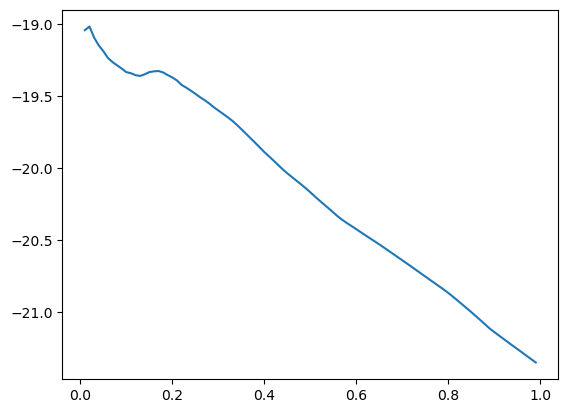

In [158]:
alpha=[]
error=[]
for i in range(1,100):
    alpha.append(i/100)
    lml=Lasso(alpha=i/100)
    error.append(np.mean(cross_val_score(lml,X_train,y_train,scoring = 'neg_mean_absolute_error')))
plt.plot(alpha,error)

In [159]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
1,0.02,-19.017121


In [160]:
#lasso regression

In [161]:
#random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
np.mean(cross_val_score(rf,X_train,y_train,scoring='neg_mean_absolute_error'))

-13.590857855006409

In [162]:
#tune models Gridsearchcv
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10),'criterion':('squared_error','absolute_error'),'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error')
gs.fit(X_train,y_train)

D:\AnaConda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
290 fits failed out of a total of 870.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
290 fits failed with the following error:
Traceback (most recent call last):
  File "D:\AnaConda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\AnaConda\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "D:\AnaConda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\AnaConda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_para

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'absolute_error'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [163]:
gs.best_score_

-13.256221154271177

In [164]:
gs.best_estimator_


RandomForestRegressor(max_features='sqrt', n_estimators=290)

In [165]:
print("hello")

hello


In [166]:
pred_lm = lm.predict(X_test)
pred_lml = lm_l.predict(X_test)
pred_rf = gs.best_estimator_.predict(X_test)

In [167]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,pred_lm)


18.8551899902144

In [168]:
mean_absolute_error(y_test,pred_lml)


18.951795359464935

In [169]:
mean_absolute_error(y_test,pred_rf)

12.257880120342515

In [170]:
mean_absolute_error(y_test,(pred_lm+pred_rf)/2)

14.357848163404435